In [45]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
csv = pd.read_csv('NewListAll2014-UPDATE01.csv')

df = pd.DataFrame(csv)
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'State_y'])
df = df.set_index('FIPS')
df.head()

,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,Drug Mortality Rate(F),...,HPSA Score,HPSA Shortage,County,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga County,"54,876","54,366",5.8,1.45,0.90,2.11,7.32,5.17,...,16,6.96,Autauga County,1001.0,17.0,NaN,NaN,17.0,55395.0,1
1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,13.30,11.24,...,15,1.03,Baldwin County,1003.0,97.0,18.0,40.0,155.0,200111.0,11
1005,AL,Barbour County,"26,758","34,971",10.5,2.72,1.89,3.57,5.40,3.35,...,12,0.93,Barbour County,1005.0,11.0,NaN,NaN,11.0,26887.0,1
1007,AL,Bibb County,"22,541","39,546",7.2,1.22,0.70,1.92,13.03,9.76,...,19,0.00,Bibb County,1007.0,10.0,NaN,NaN,10.0,22506.0,1
1009,AL,Blount County,"57,521","45,567",6.1,1.31,0.77,2.03,14.38,11.55,...,18,16.66,Blount County,1009.0,24.0,NaN,12.0,36.0,57719.0,2


In [71]:
bins = [0, 15, 50, 400]

group = ['Low McDonalds', 'Middle McDonalds', 'High McDonalds']

In [72]:
df['HH_income_2014'] = (df['HH_income_2014'].replace(',', '', regex=True).astype(float))

df.head()

,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,Drug Mortality Rate(F),...,HPSA Shortage,County,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count,Income_Status
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga County,"54,876",54366.0,5.8,1.45,0.90,2.11,7.32,5.17,...,6.96,Autauga County,1001.0,17.0,NaN,NaN,17.0,55395.0,1,Low Income
1003,AL,Baldwin County,"199,189",49626.0,6.1,2.53,1.88,3.36,13.30,11.24,...,1.03,Baldwin County,1003.0,97.0,18.0,40.0,155.0,200111.0,11,Low Income
1005,AL,Barbour County,"26,758",34971.0,10.5,2.72,1.89,3.57,5.40,3.35,...,0.93,Barbour County,1005.0,11.0,NaN,NaN,11.0,26887.0,1,Low Income
1007,AL,Bibb County,"22,541",39546.0,7.2,1.22,0.70,1.92,13.03,9.76,...,0.00,Bibb County,1007.0,10.0,NaN,NaN,10.0,22506.0,1,Low Income
1009,AL,Blount County,"57,521",45567.0,6.1,1.31,0.77,2.03,14.38,11.55,...,16.66,Blount County,1009.0,24.0,NaN,12.0,36.0,57719.0,2,Low Income


In [73]:
df["McDonalds Grouping"] = pd.cut(df["McDonalds Count"], bins, labels=group)

df.head()

,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,Drug Mortality Rate(F),...,County,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count,Income_Status,McDonalds Grouping
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga County,"54,876",54366.0,5.8,1.45,0.90,2.11,7.32,5.17,...,Autauga County,1001.0,17.0,NaN,NaN,17.0,55395.0,1,Low Income,Low McDonalds
1003,AL,Baldwin County,"199,189",49626.0,6.1,2.53,1.88,3.36,13.30,11.24,...,Baldwin County,1003.0,97.0,18.0,40.0,155.0,200111.0,11,Low Income,Low McDonalds
1005,AL,Barbour County,"26,758",34971.0,10.5,2.72,1.89,3.57,5.40,3.35,...,Barbour County,1005.0,11.0,NaN,NaN,11.0,26887.0,1,Low Income,Low McDonalds
1007,AL,Bibb County,"22,541",39546.0,7.2,1.22,0.70,1.92,13.03,9.76,...,Bibb County,1007.0,10.0,NaN,NaN,10.0,22506.0,1,Low Income,Low McDonalds
1009,AL,Blount County,"57,521",45567.0,6.1,1.31,0.77,2.03,14.38,11.55,...,Blount County,1009.0,24.0,NaN,12.0,36.0,57719.0,2,Low Income,Low McDonalds


In [74]:
df_low = (df['McDonalds Grouping'] == 'Low McDonalds')
df_mid = df['McDonalds Grouping'] == 'Middle McDonalds'
df_Up = df['McDonalds Grouping'] == 'High McDonalds'

In [75]:
df_lowIncome = df[df_low]
df_midIncome = df[df_mid]
df_UpIncome = df[df_Up]

In [81]:
# dfM = df['Mental Deaths'] > 0
# df_Master = df[dfM]

dfM1 = df_lowIncome['Mental Deaths'] > 0
df_Master1 = df_lowIncome[dfM1]

dfM2 = df_midIncome['Mental Deaths'] > 0
df_Master2 = df_midIncome[dfM2]

dfM3 = df_UpIncome['Mental Deaths'] > 0
df_Master3 = df_UpIncome[dfM3]

,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),Drug Mortality Rate,Drug Mortality Rate(F),...,County,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count,Income_Status,McDonalds Grouping
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga County,"54,876",54366.0,5.8,1.45,0.90,2.11,7.32,5.17,...,Autauga County,1001.0,17.0,NaN,NaN,17.0,55395.0,1,Low Income,Low McDonalds
1003,AL,Baldwin County,"199,189",49626.0,6.1,2.53,1.88,3.36,13.30,11.24,...,Baldwin County,1003.0,97.0,18.0,40.0,155.0,200111.0,11,Low Income,Low McDonalds
1005,AL,Barbour County,"26,758",34971.0,10.5,2.72,1.89,3.57,5.40,3.35,...,Barbour County,1005.0,11.0,NaN,NaN,11.0,26887.0,1,Low Income,Low McDonalds
1007,AL,Bibb County,"22,541",39546.0,7.2,1.22,0.70,1.92,13.03,9.76,...,Bibb County,1007.0,10.0,NaN,NaN,10.0,22506.0,1,Low Income,Low McDonalds
1009,AL,Blount County,"57,521",45567.0,6.1,1.31,0.77,2.03,14.38,11.55,...,Blount County,1009.0,24.0,NaN,12.0,36.0,57719.0,2,Low Income,Low McDonalds
1013,AL,Butler County,"20,343",32512.0,8.6,1.61,1.07,2.28,6.45,3.99,...,Butler County,1013.0,11.0,NaN,NaN,11.0,20296.0,1,Low Income,Low McDonalds
1015,AL,Calhoun County,"115,995",41123.0,8.0,1.50,1.02,2.09,11.51,9.31,...,Calhoun County,1015.0,58.0,NaN,19.0,77.0,115916.0,6,Low Income,Low McDonalds
1017,AL,Chambers County,"33,980",34116.0,6.7,2.35,1.63,3.21,8.65,5.95,...,Chambers County,1017.0,17.0,NaN,NaN,17.0,34076.0,1,Low Income,Low McDonalds
1019,AL,Cherokee County,"25,902",38013.0,5.8,1.33,0.82,1.98,11.15,8.10,...,Cherokee County,1019.0,16.0,NaN,NaN,16.0,26037.0,1,Low Income,Low McDonalds


In [77]:
# X = df_Master['Mental Deaths']
# Y = df_Master['McDonalds Count']

X1 = df_Master1['McDonalds Count']
Y1 = df_Master1['Mental Deaths']

X2 = df_Master2['McDonalds Count']
Y2 = df_Master2['Mental Deaths']

X3 = df_Master3['McDonalds Count']
Y3 = df_Master3['Mental Deaths']


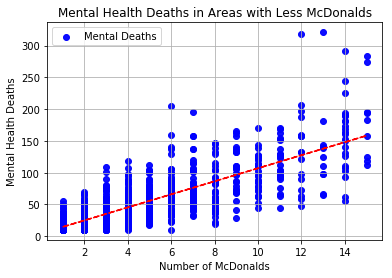

R-sqaured: 0.6808005310137762


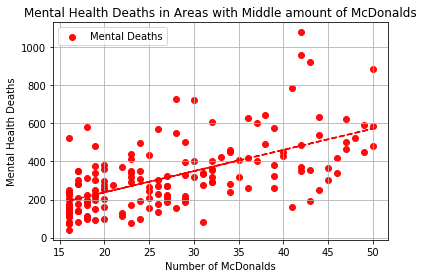

R-sqaured: 0.3834675442890464


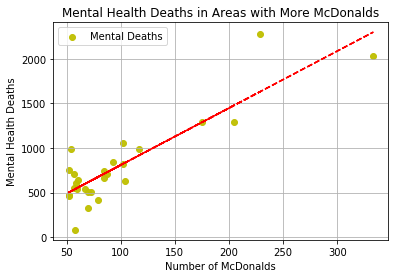

R-sqaured: 0.7687019651779331


In [80]:
# plt.scatter(X, Y, alpha=0.95, c='g')
# z = np.polyfit(X, Y, 1)
# p = np.poly1d(z)
# plt.plot(X, p(X), "r--")
# plt.xlabel('Mental Health Deaths')
# plt.ylabel('Number of McDonalds')
# plt.legend()
# plt.grid()
# plt.title('Mental Health Deaths and McDonalds')
# plt.show()

plt.scatter(X1, Y1, alpha=0.95, c='b')
z = np.polyfit(X1, Y1, 1)
p = np.poly1d(z)
plt.plot(X1, p(X1), "r--")
plt.xlabel('Number of McDonalds')
plt.ylabel('Mental Health Deaths')
plt.legend()
plt.grid()
plt.title('Mental Health Deaths in Areas with Less McDonalds')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(X1, Y1)

print(f'R-sqaured: {r_value**2}')


plt.scatter(X2, Y2, alpha=0.95, c='r')
z = np.polyfit(X2, Y2, 1)
p = np.poly1d(z)
plt.plot(X2, p(X2), "r--")
plt.xlabel('Number of McDonalds')
plt.ylabel('Mental Health Deaths')
plt.legend()
plt.grid()
plt.title('Mental Health Deaths in Areas with Middle amount of McDonalds')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(X2, Y2)

print(f'R-sqaured: {r_value**2}')

plt.scatter(X3, Y3, alpha=0.95, c='y')
z = np.polyfit(X3, Y3, 1)
p = np.poly1d(z)
plt.plot(X3, p(X3), "r--")
plt.xlabel('Number of McDonalds')
plt.ylabel('Mental Health Deaths')
plt.legend()
plt.grid()
plt.title('Mental Health Deaths in Areas with More McDonalds')
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(X3, Y3)

print(f'R-sqaured: {r_value**2}')



In [79]:
Xa = df_Master3[['McDonalds Count', 'HH_income_2014', 'Unemployment_rate_2014']]
Ya = df_Master3['Mental Deaths']
Ra = sm.add_constant(Xa)
rega = sm.OLS(Ya.astype(float), Xa.astype(float)).fit()

Xb = df_Master3[['McDonalds Count', 'HH_income_2014']] 
Yb = df_Master3['Mental Deaths']
Rb = sm.add_constant(Xb)
regb = sm.OLS(Yb.astype(float), Xb.astype(float)).fit()

Xc = df_Master3[['McDonalds Count', 'Unemployment_rate_2014']]
Yc = df_Master3['Mental Deaths']
Rc = sm.add_constant(Xc)
regc = sm.OLS(Yc.astype(float), Xc.astype(float)).fit()

rega.summary(), regb.summary(), regc.summary()

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:          Mental Deaths   R-squared (uncentered):                   0.940
 Model:                            OLS   Adj. R-squared (uncentered):              0.932
 Method:                 Least Squares   F-statistic:                              125.1
 Date:                Tue, 30 Jul 2019   Prob (F-statistic):                    8.70e-15
 Time:                        00:34:11   Log-Likelihood:                         -184.67
 No. Observations:                  27   AIC:                                      375.3
 Df Residuals:                      24   BIC:                                      379.2
 Df Model:                           3                                                  
 Covariance Type:            nonrobust                                                  
                              coef    std err          t    

In [83]:
dfM4 = df_Master1['HH_income_2014'] > 0
df_Master4 = df_Master1[dfM4]

In [88]:
Xz = df_Master4[['McDonalds Count', 'HH_income_2014', 'Unemployment_rate_2014']]
Yz = df_Master4['Mental Deaths']
Rz = sm.add_constant(Xz)
regz = sm.OLS(Yz.astype(float), Xz.astype(float)).fit()

regz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Mental Deaths   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              2799.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):                        0.00
Time:                        00:50:32   Log-Likelihood:                         -6867.6
No. Observations:                1521   AIC:                                  1.374e+04
Df Residuals:                    1518   BIC:                                  1.376e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
McDonalds Count           10.0754      0.189     53.243      0.000       9.704      10.447
HH_income_2014             0.0002   3.08e-05      5.017      0.000    9.41e-05       0.000
Unemployment_rate_2014    -0.3510      0.195     -1.798      0.072      -0.734       0.032
==============================================================================
Omnibus:                      652.561   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9077.245
Skew:                           1.618   Prob(JB):                         0.00
Kurtosis:                      14.522   Cond. No.                     1.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""